In [162]:
import numpy as np  
import pandas as pd  
import seaborn as sns  
import seaborn as sb
import matplotlib.pyplot as plt  
from sklearn import metrics

In [163]:
df = pd.read_excel('xAPI-Edu-Data1.xlsx')
df

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


<H4>Firstly some basic exploratory data analysis is performed</H1>

In [5]:
#Sum of null values in each column
df.isna().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [7]:
df.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [8]:
df.shape

(480, 17)

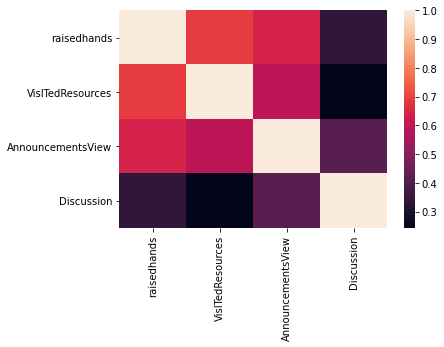

In [9]:
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

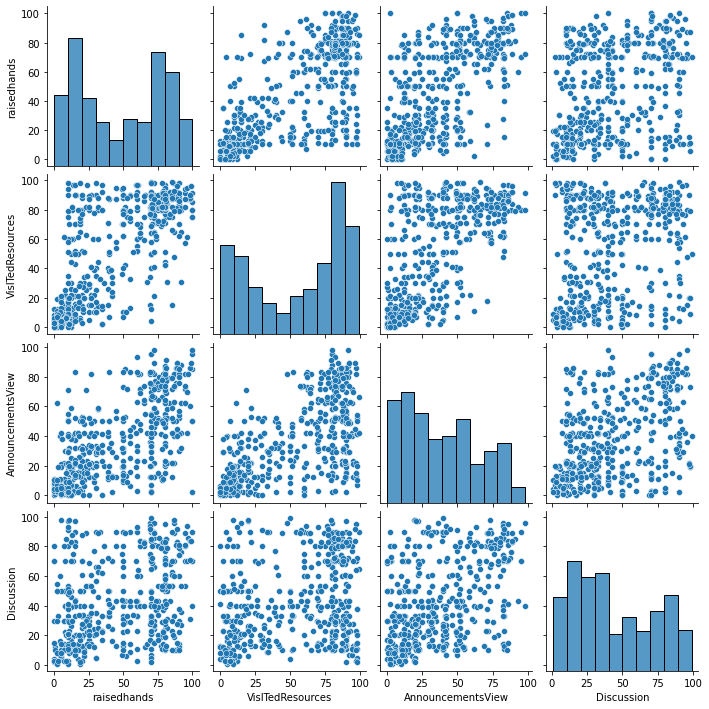

In [24]:
sb.pairplot(df)

### 1. Visualize just the categorical features individually to see what options are included and how each option fares when it comes to count(how many times it appears) and see what can be deduce from that?

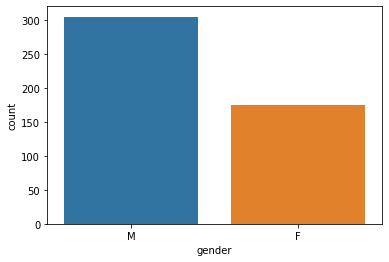

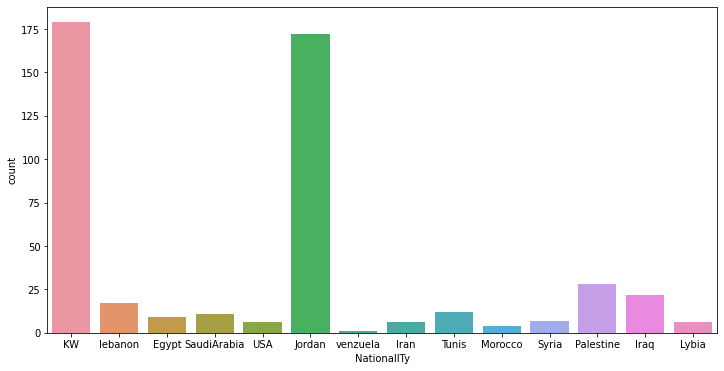

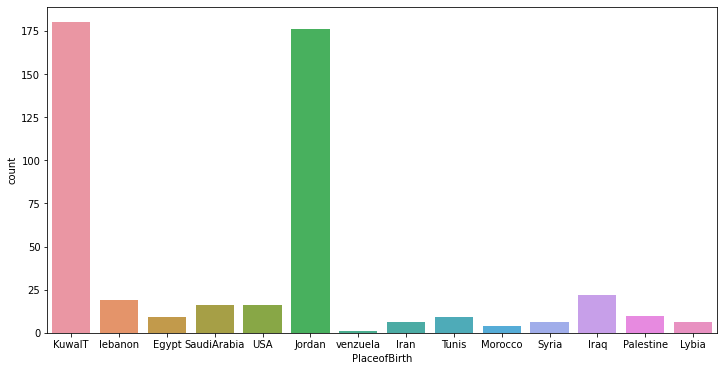

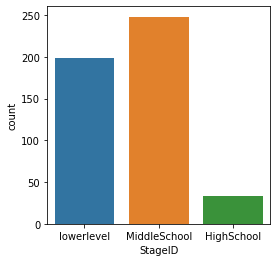

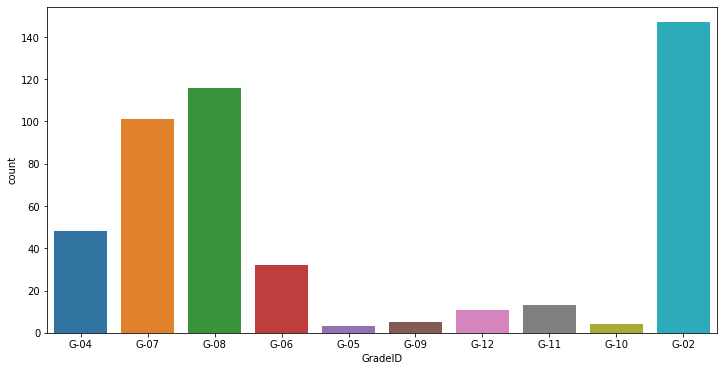

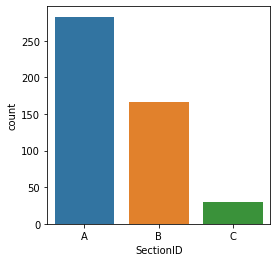

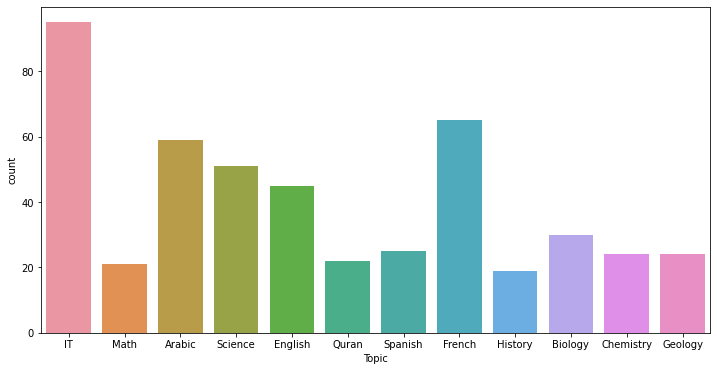

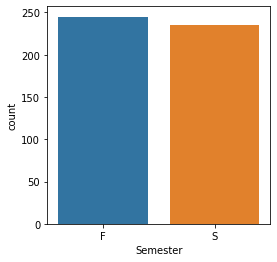

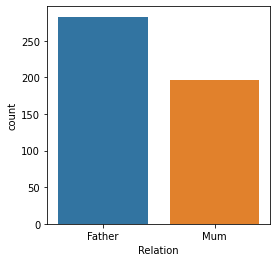

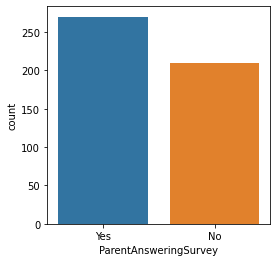

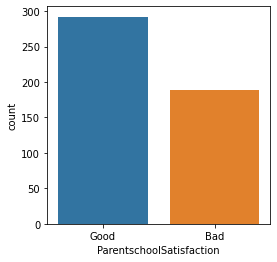

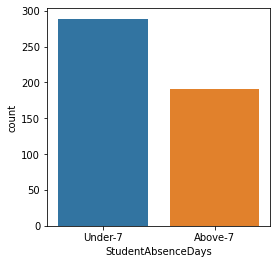

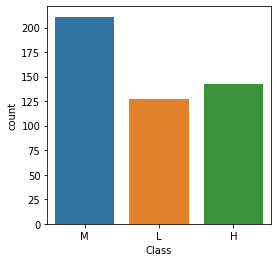

In [86]:
sns.countplot(data = df, x = 'gender')
fig_dims = (12,6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(data = df, x = 'NationalITy')
fig_dims = (12, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(data = df, x = 'PlaceofBirth')
fig_dims = (4, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(data = df, x = 'StageID')
fig_dims = (12, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(data = df, x = 'GradeID') 
fig_dims = (4, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(data = df, x = 'SectionID') 
fig_dims = (12, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(data = df, x = 'Topic') 
fig_dims = (4,4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(data = df, x = 'Semester')
fig_dims = (4, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(data = df, x = 'Relation')
fig_dims = (4, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(data = df, x = 'ParentAnsweringSurvey')
fig_dims = (4, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(data = df, x = 'ParentschoolSatisfaction')
fig_dims = (4, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(data = df, x = 'StudentAbsenceDays')
fig_dims = (4, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(data = df, x = 'Class')

### 2. Look at some categorical features in relation to each other, to see what insights could be possibly read?

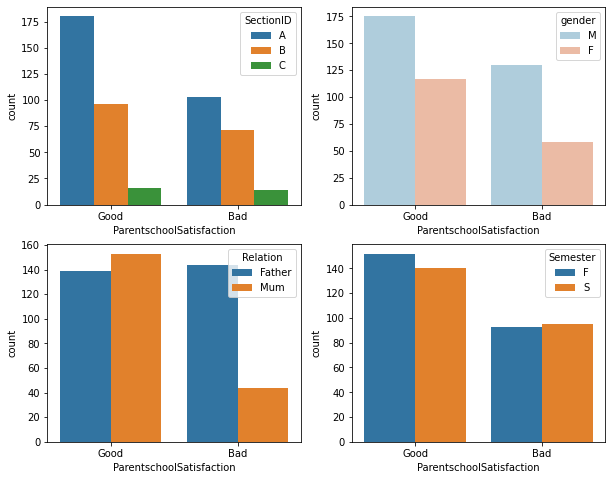

In [89]:
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(10,8))
sns.countplot(ax=ax[0,0] ,x='ParentschoolSatisfaction', hue='SectionID',data=df)
sns.countplot(ax=ax[0,1], x='ParentschoolSatisfaction', hue='gender',data=df,palette='RdBu_r')
sns.countplot(ax=ax[1,0] ,x='ParentschoolSatisfaction', hue='Relation',data=df)
sns.countplot(ax=ax[1,1] ,x='ParentschoolSatisfaction', hue='Semester',data=df)


More mothers gave a positvie review as compared to fathers

### 3. Visualize categorical variables with numerical variables and give conclusions?

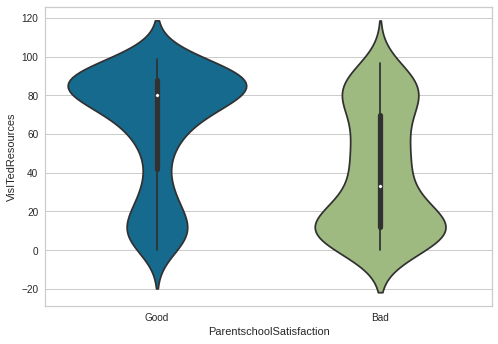

In [183]:
sns.violinplot(data=df, x='ParentschoolSatisfaction', y='VisITedResources')

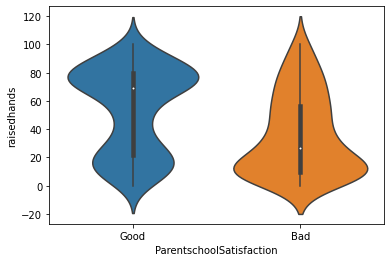

In [96]:
sns.violinplot(data=df, x='ParentschoolSatisfaction', y='raisedhands')

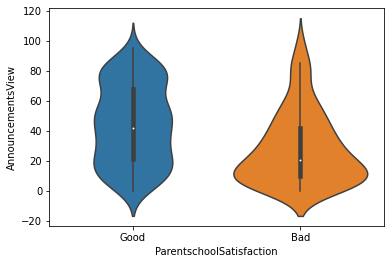

In [97]:
sns.violinplot(data=df, x='ParentschoolSatisfaction', y='AnnouncementsView')

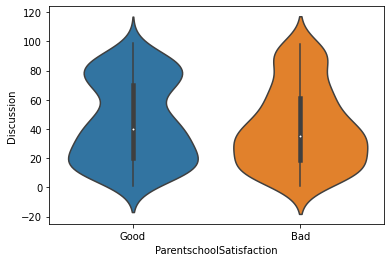

In [99]:
sns.violinplot(data=df, x='ParentschoolSatisfaction', y='Discussion')

### 4. From the above result, what are the factors that leads to get low grades of the students?

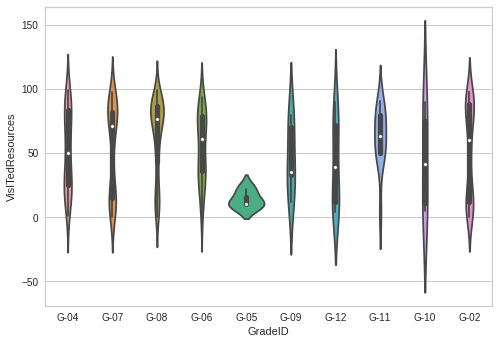

In [185]:
sns.violinplot(data=df, x='GradeID', y='VisITedResources')

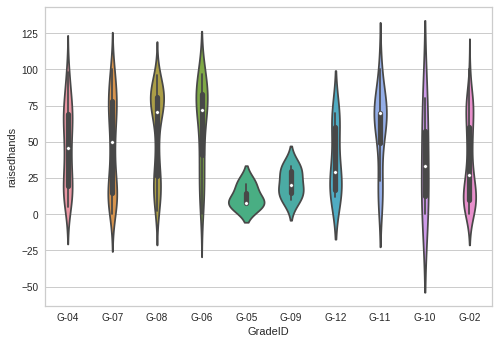

In [181]:
sns.violinplot(data=df, x='GradeID', y='raisedhands')

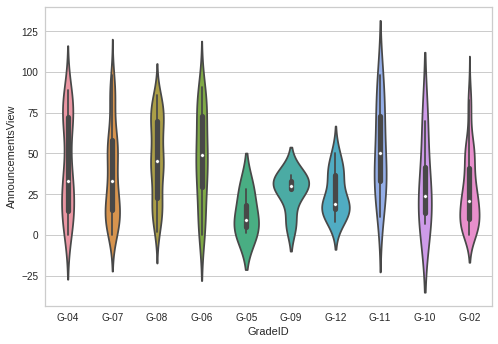

In [180]:
sns.violinplot(data=df, x='GradeID', y='AnnouncementsView')

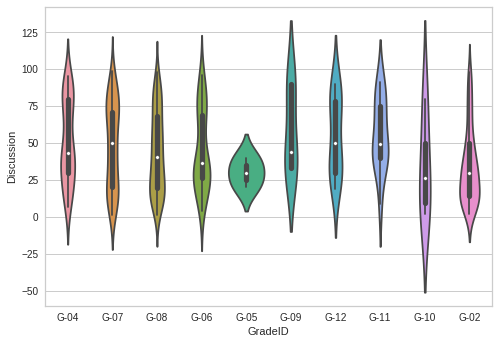

In [179]:
sns.violinplot(data=df, x='GradeID', y='Discussion')

### 5. Build classification model and present it's classification report ?

In [108]:
print(df['GradeID'].value_counts(normalize=True)*100)

G-02    30.625000
G-08    24.166667
G-07    21.041667
G-04    10.000000
G-06     6.666667
G-11     2.708333
G-12     2.291667
G-09     1.041667
G-10     0.833333
G-05     0.625000
Name: GradeID, dtype: float64


[[24  2  0  0  1  7  0  0  0]
 [ 8  0  0  0  0  2  0  0  0]
 [ 1  0  0  0  0  0  0  0  0]
 [ 2  0  0  1  1  4  0  0  0]
 [17  0  0  0  3  9  0  0  0]
 [10  0  0  1  4 17  0  0  0]
 [ 1  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  1  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0]]


Text(0.5, 352.48, 'Predicted label')

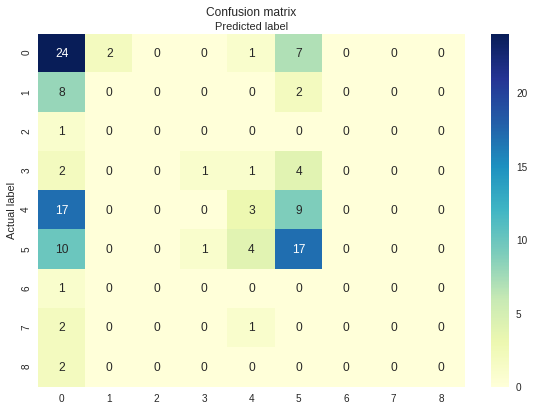

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#split dataset in features and target variable
feature_cols = ['raisedhands','VisITedResources','AnnouncementsView','Discussion']
X = df[feature_cols] # Features
y = df['GradeID'] # Target variable

#################################################
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
###########################################

# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
###########################################


class_names=["G-02","G-08","G-07","G-04","G-06","G-11","G-12","G-09","G-10","G-05"] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(10)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap


sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
#position : {'top', 'bottom'}

plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')







In [176]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision Score : ",precision_score(y_test, y_pred, pos_label=1, average='macro'))
print("Recall Score :" , recall_score(y_test, y_pred, pos_label=1, average='macro'))

Accuracy: 0.375
Precision Score :  0.17712293234681295
Recall Score : 0.1628422920892495


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report

In [178]:
classes = ["G-02","G-08","G-07","G-04","G-06","G-11","G-12","G-09","G-10"]
print(classification_report(y_test, y_pred, target_names=classes))


              precision    recall  f1-score   support

        G-02       0.36      0.71      0.48        34
        G-08       0.00      0.00      0.00        10
        G-07       0.00      0.00      0.00         1
        G-04       0.50      0.12      0.20         8
        G-06       0.30      0.10      0.15        29
        G-11       0.44      0.53      0.48        32
        G-12       0.00      0.00      0.00         1
        G-09       0.00      0.00      0.00         3
        G-10       0.00      0.00      0.00         2

    accuracy                           0.38       120
   macro avg       0.18      0.16      0.15       120
weighted avg       0.32      0.38      0.31       120



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
